# Image classifier for CIFAR10 dataset using TensorFlow.

## Load Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix, classification_report
sns.set_style('darkgrid')

## Load and Preprocess data

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

170500096/170498071 [==============================] - 3s 0us/step


## Build model

In [3]:
Classifier = Sequential()

Classifier.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                      kernel_initializer='he_uniform', padding='same', 
                      input_shape = (32, 32, 3)))
Classifier.add(BatchNormalization())

Classifier.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu',
                     kernel_initializer='he_uniform', padding='same'))
Classifier.add(BatchNormalization())
Classifier.add(MaxPool2D(pool_size = (2, 2)))
Classifier.add(Dropout(0.2))

Classifier.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
                      kernel_initializer='he_uniform', padding='same'))
Classifier.add(BatchNormalization())

Classifier.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu',
                     kernel_initializer='he_uniform', padding='same'))
Classifier.add(BatchNormalization())
Classifier.add(MaxPool2D(pool_size = (2, 2)))
Classifier.add(Dropout(0.3))

Classifier.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', 
                      kernel_initializer='he_uniform', padding='same'))
Classifier.add(BatchNormalization())

Classifier.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu',
                     kernel_initializer='he_uniform', padding='same'))
Classifier.add(BatchNormalization())
Classifier.add(MaxPool2D(pool_size = (2, 2)))
Classifier.add(Dropout(0.4))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation='relu'))
Classifier.add(BatchNormalization())
Classifier.add(Dropout(0.5))

Classifier.add(Dense(units = 10, activation='softmax'))

Classifier.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [4]:
Classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

## Training the neural network

In [5]:
earlystop = EarlyStopping(monitor='val_loss', mode = 'min', patience=3)

Classifier.fit(x = X_train, y = y_train, epochs = 20, validation_data=(X_test, y_test), callbacks=[earlystop])

Epoch 1/20
1563/1563 [==============================] - 17s 6ms/step - loss: 1.9110 - accuracy: 0.3644 - val_loss: 1.1250 - val_accuracy: 0.5945
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1067 - accuracy: 0.6116 - val_loss: 0.9925 - val_accuracy: 0.6518
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9124 - accuracy: 0.6795 - val_loss: 0.8006 - val_accuracy: 0.7240
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8034 - accuracy: 0.7218 - val_loss: 0.6587 - val_accuracy: 0.7745
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7085 - accuracy: 0.7547 - val_loss: 0.6074 - val_accuracy: 0.7920
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6561 - accuracy: 0.7748 - val_loss: 0.6289 - val_accuracy: 0.7829
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6146 - accuracy: 0.7918 - val_loss: 0.5963 - val_accuracy

## Plotting losses and accuracies

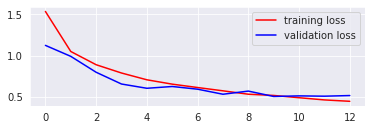

In [6]:
history = pd.DataFrame(Classifier.history.history)
plt.subplot(211)
plt.plot(history['loss'], color = 'red', label = 'training loss')
plt.plot(history['val_loss'], color = 'blue', label = 'validation loss')
plt.legend()
plt.show()

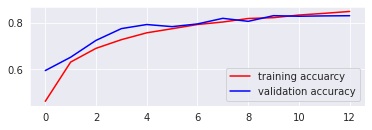

In [7]:
plt.subplot(212)
plt.plot(history['accuracy'], color = 'red', label = 'training accuarcy')
plt.plot(history['val_accuracy'], color = 'blue', label = 'validation accuracy')
plt.legend()
plt.show()

## Model evaluation

In [8]:
loss, acc = Classifier.evaluate(X_test, y_test)
print("\n\nLoss:", loss, "\nAccuracy:", acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.5197 - accuracy: 0.8298


Loss: 0.5197291374206543 
Accuracy: 0.829800009727478


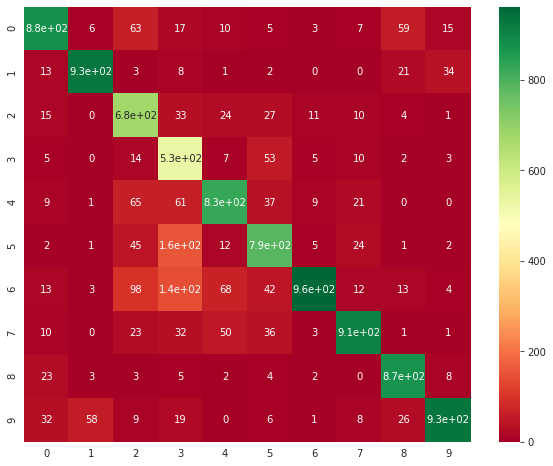



               precision    recall  f1-score   support

           0       0.88      0.83      0.85      1063
           1       0.93      0.92      0.92      1010
           2       0.68      0.84      0.75       802
           3       0.53      0.84      0.65       626
           4       0.83      0.80      0.81      1029
           5       0.79      0.76      0.77      1035
           6       0.96      0.71      0.82      1357
           7       0.91      0.85      0.88      1064
           8       0.87      0.95      0.91       923
           9       0.93      0.85      0.89      1091

    accuracy                           0.83     10000
   macro avg       0.83      0.84      0.83     10000
weighted avg       0.85      0.83      0.83     10000



In [9]:
y_actual = np.argmax(Classifier.predict(X_test), axis = -1)
y_pred = [np.argmax(y) for y in y_test]

cm = confusion_matrix(y_actual, y_pred)
plt.figure(figsize = (10, 8))
sns.heatmap(cm, cmap = 'RdYlGn', annot = True)
plt.show()

cr = classification_report(y_actual, y_pred)
print("\n\n",cr)

## Sample classification


In [10]:
def prediction(image):
  image = np.expand_dims(image, axis=0)
  output = Classifier.predict(image)
  cls = np.argmax(output)
  classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
              'horse', 'ship', 'truck']
  return classes[cls], f'{output[0][cls]:.4f}%'

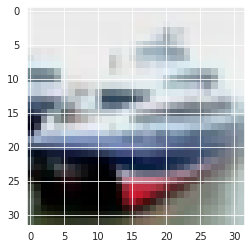

In [11]:
plt.imshow(X_test[1])

In [12]:
prediction(X_test[1])

('ship', '0.9827%')

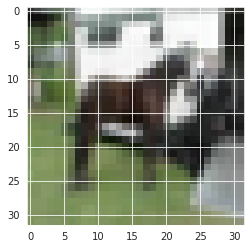

In [18]:
plt.imshow(X_test[20])

In [17]:
prediction(X_test[20])

('horse', '0.9975%')

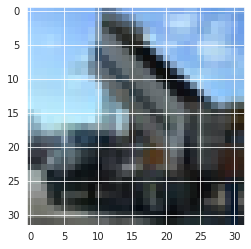

In [19]:
plt.imshow(X_test[50])

In [20]:
prediction(X_test[50])

('truck', '0.9991%')

# Thank You
### by S.R.Vishal